<img src= "https://as.com/meristation/imagenes/2020/02/13/noticias/1581576624_508899_1581576871_noticia_normal.jpg"/>

Para su análisis, podemos basarnos en las siguientes notebooks:

## Pokemon: EDA with Plotly
https://www.kaggle.com/bryanb/pokemon-eda-with-plotly

## Basic EDA and clustering
https://www.kaggle.com/brunovr/basic-eda-and-clustering

La idea es realizar un análisis exploratorio de las estadísticas de los diferentes tipos de pokemon de las generaciones 1 a 8. Además el uso de algún modelo de aprendizaje para toma de decisiones.

In [1]:
# Data analysis and wrangling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

# Análisis manual de Pokedex

In [2]:
pokedex = pd.read_csv('C:/Users/beyon/Desktop/Materias 2020/pokedex_(Update_05.20).csv')
pokedex = pokedex.drop(['Unnamed: 0'], axis=1)

In [3]:
!pip install autoviz
!pip install ppscore

In [3]:
pokedex.head()

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [5]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   german_name       938 non-null    object 
 3   japanese_name     938 non-null    object 
 4   generation        1028 non-null   int64  
 5   status            1028 non-null   object 
 6   species           1028 non-null   object 
 7   type_number       1028 non-null   int64  
 8   type_1            1028 non-null   object 
 9   type_2            542 non-null    object 
 10  height_m          1028 non-null   float64
 11  weight_kg         1027 non-null   float64
 12  abilities_number  1028 non-null   int64  
 13  ability_1         1025 non-null   object 
 14  ability_2         513 non-null    object 
 15  ability_hidden    810 non-null    object 
 16  total_points      1028 non-null   float64


In [6]:
null_filter = pokedex.isna().sum()
missing_values = null_filter.loc[pokedex.isna().sum() != 0].to_frame().copy()
missing_values

,0
german_name,90
japanese_name,90
type_2,486
weight_kg,1
ability_1,3
ability_2,515
ability_hidden,218
catch_rate,104
base_friendship,104
base_experience,104


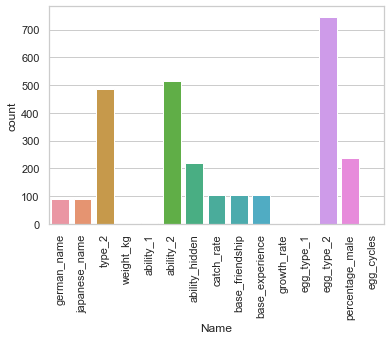

In [7]:
missing_values.columns = ['count']
missing_values['Name'] = missing_values.index
missing_values.reset_index(drop=True, inplace=True)
missing_values

sns.barplot(x='Name', y='count', data=missing_values);
plt.xticks(rotation=90);

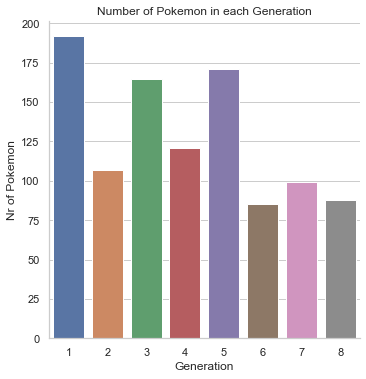

In [8]:
ax = sns.catplot(x="generation", kind="count", data=pokedex);
ax.set(xlabel='Generation', ylabel='Nr of Pokemon', title='Number of Pokemon in each Generation');

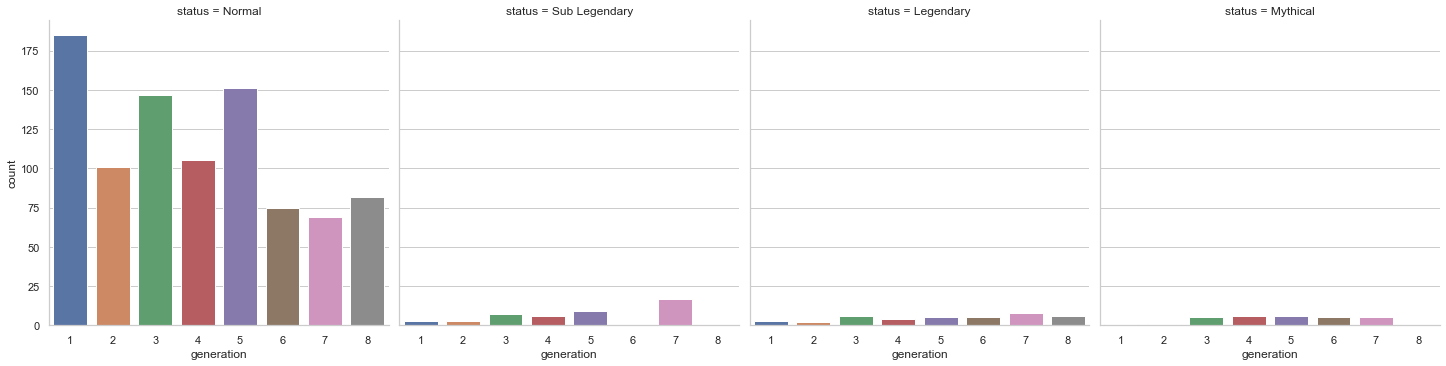

In [9]:
sns.catplot(x="generation", col="status", kind="count", data=pokedex);

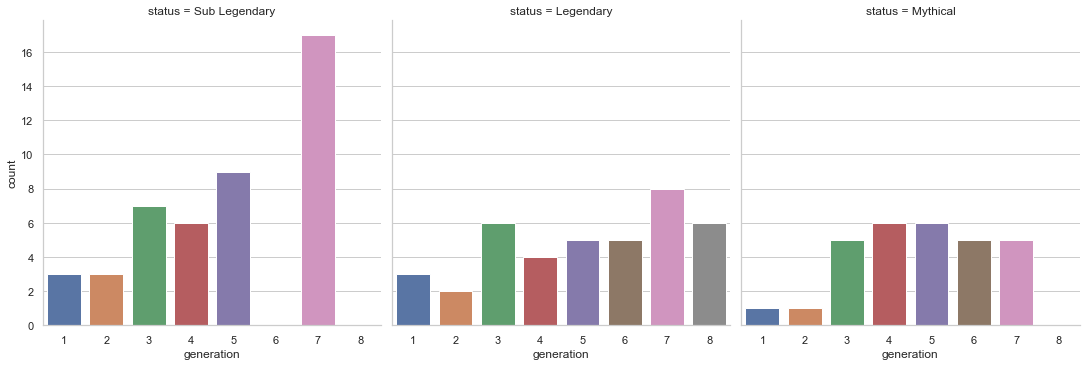

In [10]:
poke_filter = pokedex.loc[pokedex.status != "Normal"]
sns.catplot(x="generation", col="status", kind="count", data=poke_filter);

In [11]:
pokedex.groupby('generation').species.describe()

,count,unique,top,freq
generation,,,,
1,192,97,Mouse Pokémon,12
2,107,79,Light Pokémon,3
3,165,121,Weather Pokémon,4
4,121,95,Plasma Pokémon,6
5,171,136,Zen Charm Pokémon,4
6,85,57,Pumpkin Pokémon,8
7,99,72,Dancing Pokémon,4
8,88,65,Fossil Pokémon,4


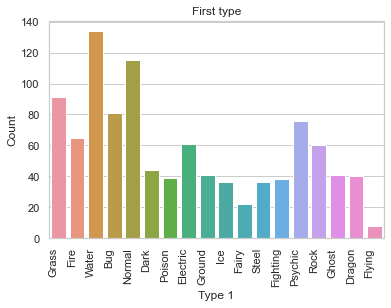

In [12]:
ax = sns.countplot(x="type_1", data=pokedex);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set(xlabel='Type 1', ylabel='Count', title='First type');

([<matplotlib.patches.Wedge at 0x2297fad63c8>,
 [Text(0.09401072178897858, 1.0959753574732944, 'Have type 2'),
  Text(-0.09401072178897847, -1.0959753574732944, 'Does not have type 2')],
 [Text(0.05127857552126104, 0.5978047404399787, '47.3%'),
  Text(-0.05127857552126098, -0.5978047404399787, '52.7%')])

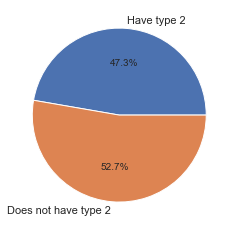

In [13]:
null_type_2=pokedex.type_2.isnull().sum()
notnull_type_2=pokedex.type_2.size-null_type_2
plt.pie([null_type_2,notnull_type_2],labels=['Have type 2','Does not have type 2'],autopct='%1.1f%%')

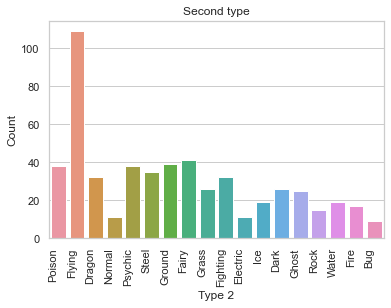

In [14]:
bx = sns.countplot(x="type_2", data=pokedex);
bx.set_xticklabels(bx.get_xticklabels(), rotation=90, ha="right")
bx.set(xlabel='Type 2', ylabel='Count', title='Second type');

<AxesSubplot:xlabel='type_2', ylabel='type_1'>

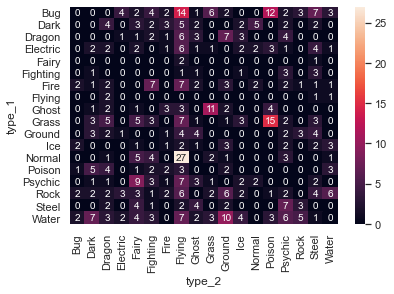

In [15]:
sns.heatmap(pd.crosstab(pokedex.type_1,pokedex.type_2),annot=True)

In [16]:
STATS_CATEGORIES = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]
pokedex[STATS_CATEGORIES].describe()

,hp,attack,defense,sp_attack,sp_defense,speed
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047
std,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

Text(0.5, 0, 'Refer Legend')

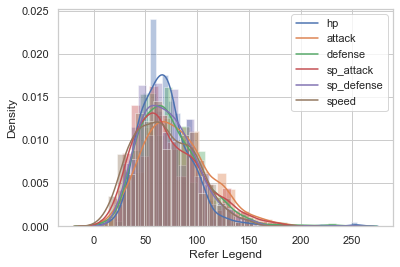

In [17]:
for each in STATS_CATEGORIES:
    sns.distplot(pokedex[each])
plt.legend(STATS_CATEGORIES)
plt.xlabel('Refer Legend')

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

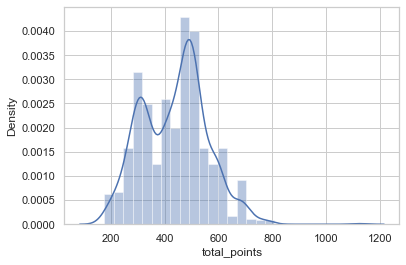

In [18]:
sns.distplot(pokedex['total_points'])

In [19]:
for colm in STATS_CATEGORIES:
    print('Max',colm,':',pokedex.loc[pokedex[colm].idxmax()]['name'])
    print('Min',colm,':',pokedex.loc[pokedex[colm].idxmin()]['name'])

Max hp : Blissey
Min hp : Shedinja
Max attack : Mega Mewtwo X
Min attack : Chansey
Max defense : Eternatus Eternamax
Min defense : Chansey
Max sp_attack : Mega Mewtwo Y
Min sp_attack : Alolan Sandshrew
Max sp_defense : Eternatus Eternamax
Min sp_defense : Caterpie
Max speed : Deoxys Speed Forme
Min speed : Shuckle


In [20]:
for each in STATS_CATEGORIES:
    print('----',each,'----')
    print(pokedex.groupby('status')[each].mean())

print('---- Total Points ----')
print(pokedex.groupby('status')['total_points'].mean())

---- hp ----
status
Legendary        111.435897
Mythical          82.827586
Normal            66.504918
Sub Legendary     87.244444
Name: hp, dtype: float64
---- attack ----
status
Legendary        125.743590
Mythical         108.172414
Normal            76.183607
Sub Legendary    102.533333
Name: attack, dtype: float64
---- defense ----
status
Legendary        108.205128
Mythical          93.275862
Normal            71.343169
Sub Legendary     96.822222
Name: defense, dtype: float64
---- sp_attack ----
status
Legendary        122.538462
Mythical         113.793103
Normal            67.722404
Sub Legendary    104.977778
Name: sp_attack, dtype: float64
---- sp_defense ----
status
Legendary        110.615385
Mythical          95.172414
Normal            68.518033
Sub Legendary     97.422222
Name: sp_defense, dtype: float64
---- speed ----
status
Legendary        101.025641
Mythical         101.241379
Normal            64.937705
Sub Legendary     92.422222
Name: speed, dtype: float64
----

<AxesSubplot:xlabel='status'>

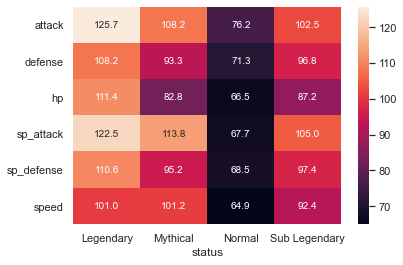

In [21]:
sns.heatmap(pd.pivot_table(pokedex,values=STATS_CATEGORIES,columns='status'),annot=True,fmt='.1f')

<AxesSubplot:ylabel='type_1'>

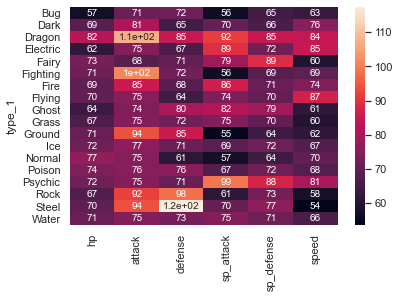

In [22]:
sns.heatmap(pokedex.groupby('type_1')[STATS_CATEGORIES].mean(),annot=True)

([<matplotlib.patches.Wedge at 0x229008d0a48>,
 [Text(-0.8260995558308912, 0.7263329290731657, 'Have gender'),
  Text(0.8260995218287923, -0.7263329677456757, 'Does not have gender')],
 [Text(-0.45059975772594063, 0.39618159767627215, '77.0%'),
  Text(0.45059973917934115, -0.39618161877036856, '23.0%')])

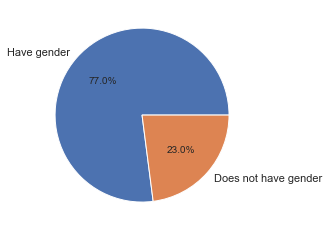

In [23]:
null_type_2=pokedex.percentage_male.isnull().sum()
notnull_type_2=pokedex.percentage_male.size-null_type_2
plt.pie([notnull_type_2,null_type_2],labels=['Have gender','Does not have gender'],autopct='%1.1f%%')

In [24]:
pokedex.groupby('status').catch_rate.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Legendary,33.0,19.666667,45.652674,3.0,3.0,3.0,5.0,255.0
Mythical,27.0,10.222222,15.660664,3.0,3.0,3.0,3.0,45.0
Normal,819.0,103.295482,73.331819,3.0,45.0,75.0,180.0,255.0
Sub Legendary,45.0,12.600000,17.311846,3.0,3.0,3.0,3.0,45.0


In [25]:
raw = pokedex.copy()

In [26]:
raw.dropna(axis=0, subset=['egg_type_1'], inplace=True)
raw.dropna(axis=0, subset=['percentage_male'], inplace=True)
raw.dropna(axis=0, subset=['egg_cycles'], inplace=True)
raw.dropna(axis=0, subset=['growth_rate'], inplace=True)
raw.reset_index()

,index,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,906,779,Bruxish,Knirfish,ハギギシリ (Hagigishiri),7,Normal,Gnash Teeth Pokémon,2,Water,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,0.5,1.0
786,907,780,Drampa,Sen-Long,ジジーロン (Jijilong),7,Normal,Placid Pokémon,2,Normal,...,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0
787,909,782,Jangmo-o,Miniras,ジャラコ (Jyarako),7,Normal,Scaly Pokémon,1,Dragon,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
788,910,783,Hakamo-o,Mediras,ジャランゴ (Jyarango),7,Normal,Scaly Pokémon,2,Dragon,...,1.0,2.0,2.0,0.5,0.5,1.0,2.0,0.5,1.0,4.0


In [27]:
data=raw[[ 'egg_type_1','percentage_male','egg_cycles' ,'growth_rate' ,'type_number']]

In [28]:
data.head()

,egg_type_1,percentage_male,egg_cycles,growth_rate,type_number
0,Grass,87.5,20.0,Medium Slow,2
1,Grass,87.5,20.0,Medium Slow,2
2,Grass,87.5,20.0,Medium Slow,2
3,Grass,87.5,20.0,Medium Slow,2
4,Dragon,87.5,20.0,Medium Slow,1


In [29]:
def create_np_array_from_input_list(input_list,output_type):
    np_target = []
    
    entries = []
    entries_idx = []
    for entry in input_list:
        duplicate = 0
        for active_entry in entries:
            if entry == active_entry:
                duplicate = 1
        
        if duplicate == 0:
            entries.append(entry)
        
        no_entries = len(entries)
        
    for i in range(0,no_entries):
        entries_idx.append(i)
        
    for entry in input_list:
        for i in range(0,no_entries):
            if entry == entries[i]:
                np_target.append(entries_idx[i])
                
    if output_type == 'numpy':
        return(np_target)
    elif output_type == 'categories':
        return(entries)
    else:
        raise ValueError('output_type must be \'numpy\' or \'categories\'')

In [30]:
np_data = create_np_array_from_input_list(data['egg_type_1'],'numpy')
cats = create_np_array_from_input_list(data['egg_type_1'],'categories')

In [31]:
data = data.reset_index()

In [32]:
data_copy = data.copy()

for i in range(0,len(np_data)):
    data_copy.at[i,'egg_type_1'] = np_data[i]


data_copy

,index,egg_type_1,percentage_male,egg_cycles,growth_rate,type_number
0,0,0,87.5,20.0,Medium Slow,2
1,1,0,87.5,20.0,Medium Slow,2
2,2,0,87.5,20.0,Medium Slow,2
3,3,0,87.5,20.0,Medium Slow,2
4,4,1,87.5,20.0,Medium Slow,1
...,...,...,...,...,...,...
785,906,13,50.0,15.0,Medium Fast,2
786,907,1,50.0,20.0,Medium Fast,2
787,909,1,50.0,40.0,Slow,1
788,910,1,50.0,40.0,Slow,2


In [33]:
for i in range(0,len(np_data)):
    data_copy.at[i,'growth_rate'] = np_data[i]

In [34]:
data_copy

,index,egg_type_1,percentage_male,egg_cycles,growth_rate,type_number
0,0,0,87.5,20.0,0,2
1,1,0,87.5,20.0,0,2
2,2,0,87.5,20.0,0,2
3,3,0,87.5,20.0,0,2
4,4,1,87.5,20.0,1,1
...,...,...,...,...,...,...
785,906,13,50.0,15.0,13,2
786,907,1,50.0,20.0,1,2
787,909,1,50.0,40.0,1,1
788,910,1,50.0,40.0,1,2


In [35]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            790 non-null    int64  
 1   egg_type_1       790 non-null    object 
 2   percentage_male  790 non-null    float64
 3   egg_cycles       790 non-null    float64
 4   growth_rate      790 non-null    object 
 5   type_number      790 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 37.2+ KB


In [36]:
for  col in ['egg_type_1', 'growth_rate']:
  data_copy[col]=data_copy[col].astype('int')

In [37]:
data_copy.corr()

,index,egg_type_1,percentage_male,egg_cycles,growth_rate,type_number
index,1.000000,0.056536,-0.029164,0.089370,0.056536,0.030015
egg_type_1,0.056536,1.000000,-0.022297,0.016306,1.000000,-0.079284
percentage_male,-0.029164,-0.022297,1.000000,0.150615,-0.022297,-0.033242
egg_cycles,0.089370,0.016306,0.150615,1.000000,0.016306,0.025944
growth_rate,0.056536,1.000000,-0.022297,0.016306,1.000000,-0.079284
type_number,0.030015,-0.079284,-0.033242,0.025944,-0.079284,1.000000


In [38]:
target = data_copy['egg_type_1']
data_copyb = data_copy[['percentage_male','egg_cycles']].to_numpy()

In [39]:
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_copy, target)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.svm import SVC
classifier = SVC(C=1.0, kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
classifier.score(X_test, y_test)

1.0

In [43]:
classifier = SVC(C=1.0, kernel='rbf')

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.7474747474747475

In [44]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
classifier.fit(data_copy, target)

DecisionTreeClassifier(max_depth=1, random_state=42)

# ML models section

In [5]:
pokedex.columns

Index(['pokedex_number', 'name', 'german_name', 'japanese_name', 'generation',
       'status', 'species', 'type_number', 'type_1', 'type_2', 'height_m',
       'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

In [7]:
list = ['german_name', 'japanese_name', 'type_number', 'species', 'type_number', 'height_m',
       'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden','catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy']

In [8]:
newpkdx = pokedex.drop(list, axis=1)

In [9]:
pokedex

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,...,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fairy,NaN,...,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,889,Zamazenta Crowned Shield,NaN,NaN,8,Legendary,Warrior Pokémon,2,Fighting,Steel,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,889,Zamazenta Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fighting,NaN,...,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


In [10]:
newpkdx

,pokedex_number,name,generation,status,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,1,Bulbasaur,1,Normal,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0
1,2,Ivysaur,1,Normal,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,3,Venusaur,1,Normal,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0
3,3,Mega Venusaur,1,Normal,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0
4,4,Charmander,1,Normal,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,8,Legendary,Fairy,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0
1024,889,Zamazenta Crowned Shield,8,Legendary,Fighting,Steel,720.0,92.0,130.0,145.0,80.0,145.0,128.0
1025,889,Zamazenta Hero of Many Battles,8,Legendary,Fighting,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0
1026,890,Eternatus,8,Legendary,Poison,Dragon,690.0,140.0,85.0,95.0,145.0,95.0,130.0


In [11]:
newpkdx['Legendary'] = np.where(newpkdx['status'] == 'Legendary', 1, 0)

In [12]:
newpkdx

,pokedex_number,name,generation,status,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,Legendary
0,1,Bulbasaur,1,Normal,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,0
1,2,Ivysaur,1,Normal,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,0
2,3,Venusaur,1,Normal,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,0
3,3,Mega Venusaur,1,Normal,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,0
4,4,Charmander,1,Normal,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,65.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,8,Legendary,Fairy,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,1
1024,889,Zamazenta Crowned Shield,8,Legendary,Fighting,Steel,720.0,92.0,130.0,145.0,80.0,145.0,128.0,1
1025,889,Zamazenta Hero of Many Battles,8,Legendary,Fighting,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,1
1026,890,Eternatus,8,Legendary,Poison,Dragon,690.0,140.0,85.0,95.0,145.0,95.0,130.0,1


In [54]:
X = newpkdx.drop(columns =['pokedex_number', 'name', 'status', 'generation', 'type_1', 'type_2', 'Legendary'])
y = newpkdx['status']

In [55]:
y

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
          ...    
1023    Legendary
1024    Legendary
1025    Legendary
1026    Legendary
1027    Legendary
Name: status, Length: 1028, dtype: object

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
from sklearn.ensemble import RandomForestClassifier as RF

clf = RF(bootstrap = True)
clf.fit(X_train, y_train)

RandomForestClassifier()

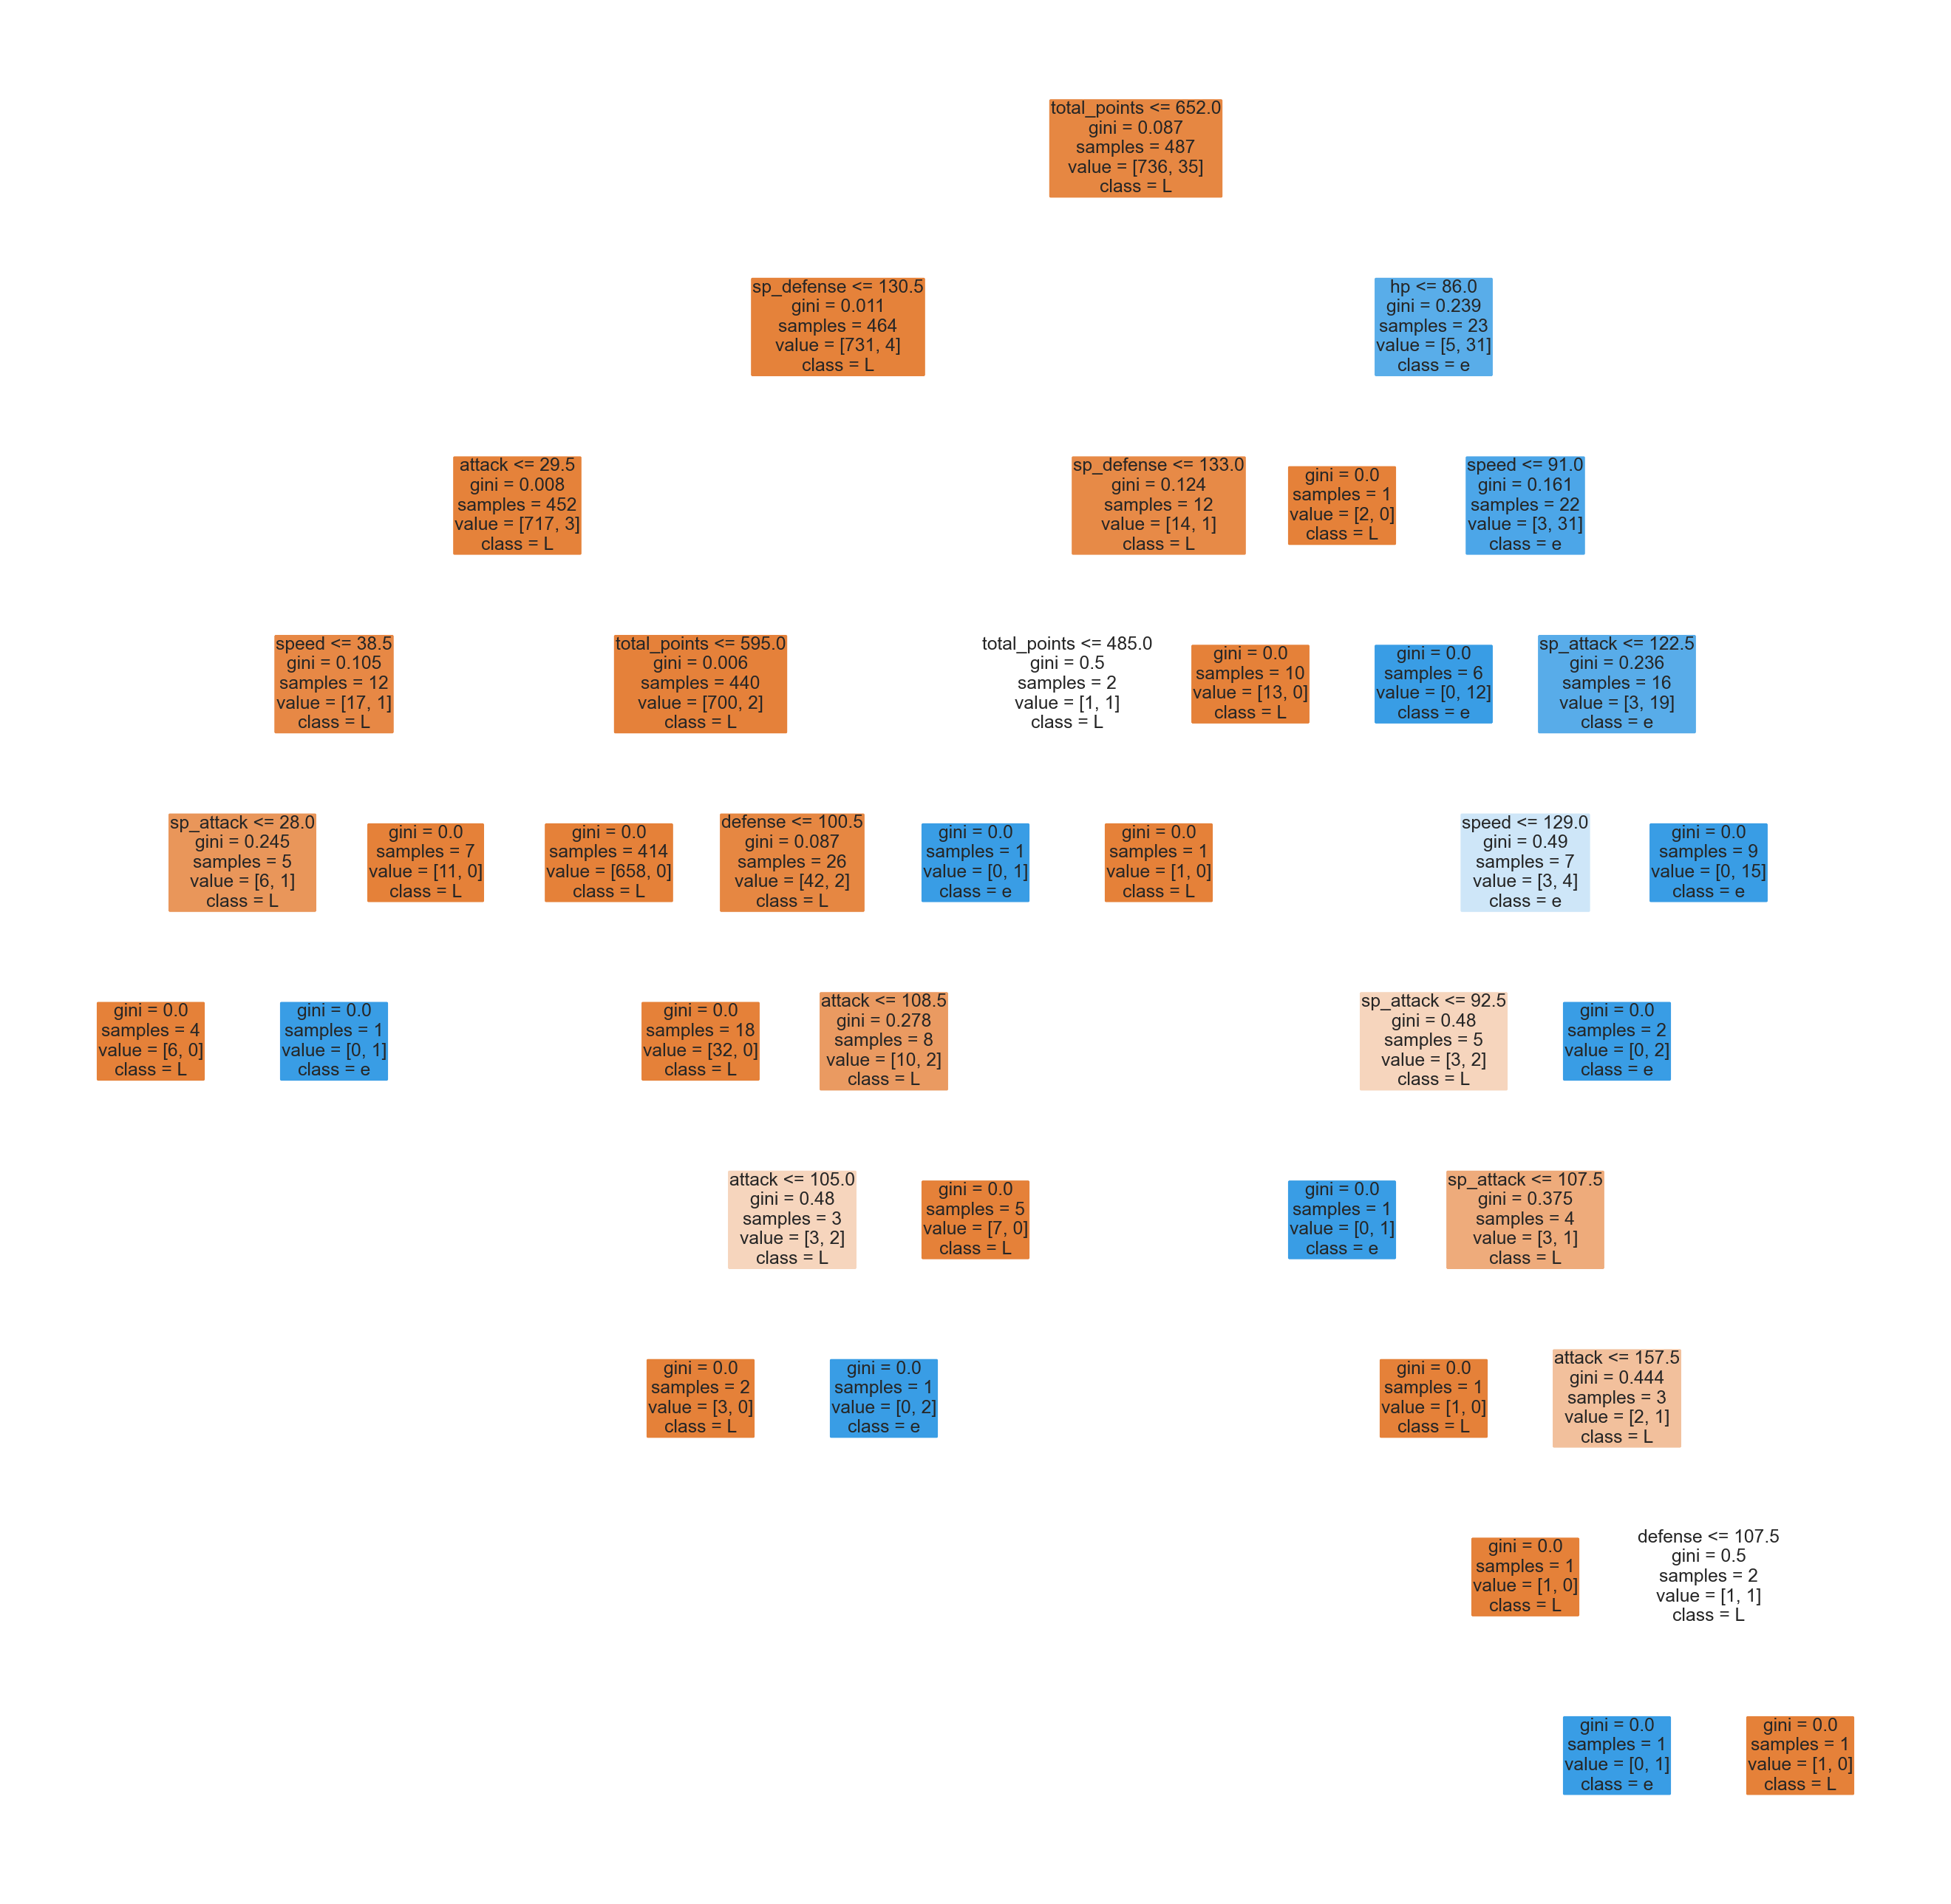

In [56]:
from sklearn import tree
fn=X.columns
cn='Legendary'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True, rounded=True);
fig.savefig('rf_individualtree.png')

In [58]:
clf.score(X_test, y_test)

0.9455252918287937

In [18]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Sens', tp/(tp+fn))
print('Spec', tn/(fp+tn))

Sens 0.9166666666666666
Spec 0.9959183673469387


# Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score

clf2 = RF(bootstrap=True)
cross_val_score(clf2, X, y, cv=10)

array([1.        , 1.        , 0.99029126, 1.        , 0.96116505,
       0.95145631, 0.98058252, 0.98058252, 1.        , 0.98039216])

In [25]:
clf2.fit(X,y)

NameError: name 'clf2' is not defined

In [61]:
y_pred2 = clf2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
print('Sens', tp/(tp+fn))
print('Spec', tn/(fp+tn))

Sens 1.0
Spec 1.0


In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [80]:
dfs = []
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
i = 1

clf3 = RF(bootstrap=True)

for train_index, test_index in kf.split(X, y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.loc[test_index]

    #Train the model
    clf3.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, clf3.predict(X_test))}, doublecheck: {clf3.score(X_test,y_test)}")
    i += 1

Accuracy for the fold no. 1 on the test set: 0.9805825242718447, doublecheck: 0.9805825242718447
Accuracy for the fold no. 2 on the test set: 1.0, doublecheck: 1.0
Accuracy for the fold no. 3 on the test set: 0.9902912621359223, doublecheck: 0.9902912621359223
Accuracy for the fold no. 4 on the test set: 0.9805825242718447, doublecheck: 0.9805825242718447
Accuracy for the fold no. 5 on the test set: 0.970873786407767, doublecheck: 0.970873786407767
Accuracy for the fold no. 6 on the test set: 1.0, doublecheck: 1.0
Accuracy for the fold no. 7 on the test set: 0.9902912621359223, doublecheck: 0.9902912621359223
Accuracy for the fold no. 8 on the test set: 0.9902912621359223, doublecheck: 0.9902912621359223
Accuracy for the fold no. 9 on the test set: 0.9803921568627451, doublecheck: 0.9803921568627451
Accuracy for the fold no. 10 on the test set: 0.9901960784313726, doublecheck: 0.9901960784313726


In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear", multi_class="auto")

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [70]:
model.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, model.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, model.predict(X_test))]})

,Accurancy on Train,Accurancy on Test
0,0.962387,0.964981


In [74]:
model2 = LogisticRegression()

In [75]:
cross_val_score(model2, X, y, cv=10)

array([1.        , 0.97087379, 0.96116505, 0.97087379, 0.94174757,
       0.96116505, 0.98058252, 0.97087379, 0.99019608, 0.99019608])

In [79]:
dfs = []
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
i = 1

model3 = LogisticRegression()

for train_index, test_index in kf.split(X, y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.loc[test_index]

    #Train the model
    model3.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model3.predict(X_test))}, doublecheck: {model3.score(X_test,y_test)}")
    i += 1

Accuracy for the fold no. 1 on the test set: 0.9805825242718447, doublecheck: 0.9805825242718447
Accuracy for the fold no. 2 on the test set: 0.9805825242718447, doublecheck: 0.9805825242718447
Accuracy for the fold no. 3 on the test set: 0.9611650485436893, doublecheck: 0.9611650485436893
Accuracy for the fold no. 4 on the test set: 0.9611650485436893, doublecheck: 0.9611650485436893
Accuracy for the fold no. 5 on the test set: 0.970873786407767, doublecheck: 0.970873786407767
Accuracy for the fold no. 6 on the test set: 0.970873786407767, doublecheck: 0.970873786407767
Accuracy for the fold no. 7 on the test set: 0.970873786407767, doublecheck: 0.970873786407767
Accuracy for the fold no. 8 on the test set: 0.9805825242718447, doublecheck: 0.9805825242718447
Accuracy for the fold no. 9 on the test set: 0.9803921568627451, doublecheck: 0.9803921568627451
Accuracy for the fold no. 10 on the test set: 0.9901960784313726, doublecheck: 0.9901960784313726


# Probemos los modelos...

![img](https://img.pokemondb.net/artwork/melmetal.jpg)

In [22]:
test = np.array([[580.0,90.0,85.0,100.0,95.0,125.0,85.0]])

<img src="https://images.gameinfo.io/pokemon/256/493-11.png" weidth="400"/>

In [23]:
test2 = np.array([[720.0,120.0,120.0,120.0,120.0,120.0,120.0]])

## ¿Será legendario Melmetal.... y qué tal Arceus?

In [60]:
clf.predict(test)[0]

'Sub Legendary'

In [62]:
clf.predict(test2)[0]

'Mythical'

## ¿Será?

# Ejercicio

En esta sección deberán realizar un nuevo dataframe, pero considerando las siguientes características (ojo!, ya no son sólo de tipo normal y legendario...)

In [30]:
pokedex.status.unique()

array(['Normal', 'Sub Legendary', 'Legendary', 'Mythical'], dtype=object)

El objetivo ahora será realizar intercambio de la variable categórica "Status" por una nueva que le asigne un número en lugar de texto

In [31]:
newpkdx2 = pokedex.drop(list, axis=1)

In [32]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
newpkdx2["make_code"] = lb_make.fit_transform(newpkdx2["status"])

In [33]:
newpkdx2

,pokedex_number,name,generation,status,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,make_code
0,1,Bulbasaur,1,Normal,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,2
1,2,Ivysaur,1,Normal,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,2
2,3,Venusaur,1,Normal,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,2
3,3,Mega Venusaur,1,Normal,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,2
4,4,Charmander,1,Normal,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,65.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,8,Legendary,Fairy,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,0
1024,889,Zamazenta Crowned Shield,8,Legendary,Fighting,Steel,720.0,92.0,130.0,145.0,80.0,145.0,128.0,0
1025,889,Zamazenta Hero of Many Battles,8,Legendary,Fighting,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,0
1026,890,Eternatus,8,Legendary,Poison,Dragon,690.0,140.0,85.0,95.0,145.0,95.0,130.0,0


Posteriormente, deberán hacer el procedimiento "normal" para los siguientes algoritmos
* Regresion Logística
* SVM (con kernel rbf - Gaussiano o radial)
* Decision Tree
* Random Forest

¿Cuál de los algoritmos podrá decir que melmetal es de tipo sub-legendario?

In [34]:
X = newpkdx2.drop(columns =['pokedex_number', 'name', 'status', 'generation', 'type_1', 'type_2', 'make_code'])
y = newpkdx2['status']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

alg1 = LogisticRegression()
alg2 = SVC(kernel = 'rbf')
alg3 = RF()
alg4 = DT()

In [39]:
alg1.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg1.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg1.predict(X_test))]})

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Accurancy on Train,Accurancy on Test
0,0.88716,0.894942


In [40]:
alg2.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg2.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg2.predict(X_test))]})

,Accurancy on Train,Accurancy on Test
0,0.9131,0.92607


In [41]:
alg3.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg3.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg3.predict(X_test))]})

,Accurancy on Train,Accurancy on Test
0,0.998703,0.964981


In [42]:
alg4.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg4.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg4.predict(X_test))]})

,Accurancy on Train,Accurancy on Test
0,0.998703,0.945525


### Probemos ahora los modelos!

In [50]:
alg1.predict(test2)[0]

'Normal'

In [51]:
alg2.predict(test2)[0]

'Legendary'

In [52]:
alg3.predict(test2)[0]

'Mythical'

In [53]:
alg4.predict(test2)[0]

'Mythical'

### ¿Alguno mejora si aplicamos CV?

In [227]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=123)
i = 1

In [228]:
alg1_cv = LogisticRegression(max_iter=10000)
alg2_cv = SVC(kernel = 'rbf')
alg3_cv = RF()
alg4_cv = DT()

for train_index, test_index in kf.split(X, y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.loc[test_index]

    #Train the model
    alg1_cv.fit(X_train, y_train) #Training the model
    alg2_cv.fit(X_train, y_train) #Training the model
    alg3_cv.fit(X_train, y_train) #Training the model
    alg4_cv.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, alg1_cv.predict(X_test))}, doublecheck: {alg1_cv.score(X_test,y_test)}")
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, alg2_cv.predict(X_test))}, doublecheck: {alg2_cv.score(X_test,y_test)}")
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, alg3_cv.predict(X_test))}, doublecheck: {alg3_cv.score(X_test,y_test)}")
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, alg4_cv.predict(X_test))}, doublecheck: {alg4_cv.score(X_test,y_test)}")
    
    i += 1

Accuracy for the fold no. 1 on the test set: 0.912621359223301, doublecheck: 0.912621359223301
Accuracy for the fold no. 1 on the test set: 0.9077669902912622, doublecheck: 0.9077669902912622
Accuracy for the fold no. 1 on the test set: 0.941747572815534, doublecheck: 0.941747572815534
Accuracy for the fold no. 1 on the test set: 0.941747572815534, doublecheck: 0.941747572815534
Accuracy for the fold no. 2 on the test set: 0.8883495145631068, doublecheck: 0.8883495145631068
Accuracy for the fold no. 2 on the test set: 0.883495145631068, doublecheck: 0.883495145631068
Accuracy for the fold no. 2 on the test set: 0.912621359223301, doublecheck: 0.912621359223301
Accuracy for the fold no. 2 on the test set: 0.9029126213592233, doublecheck: 0.9029126213592233
Accuracy for the fold no. 3 on the test set: 0.9174757281553398, doublecheck: 0.9174757281553398
Accuracy for the fold no. 3 on the test set: 0.912621359223301, doublecheck: 0.912621359223301
Accuracy for the fold no. 3 on the test se

In [245]:
alg1_cv.predict(test2)[0]

'Legendary'

In [246]:
alg2_cv.predict(test2)[0]

'Legendary'

In [247]:
alg3_cv.predict(test2)[0]

'Mythical'

In [248]:
alg4_cv.predict(test2)[0]

'Mythical'

In [249]:
newpkdx2.groupby('status').generation.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Legendary,39.0,5.128205,2.202624,1.0,3.0,5.0,7.0,8.0
Mythical,29.0,4.724138,1.623412,1.0,4.0,5.0,6.0,7.0
Normal,915.0,3.925683,2.242163,1.0,2.0,4.0,5.0,8.0
Sub Legendary,45.0,4.844444,1.999495,1.0,3.0,5.0,7.0,7.0
